In [1]:
from numpy import *
from math import *
import matplotlib.pyplot as plt

In [2]:
RAD_GRAD = 57.295779513
GRAD_RAD = 0.0174532925

GZ = 9.8
OMEGA_0 = 0.00124

TIME_END = 12000
TIME_INTERVAL = 1

In [3]:
def estimate(position_error, velocity_error, rotation_error, delta_omega, delta_n):
    delta_omega = (delta_omega * GRAD_RAD) / 3600.0
    delta_n = delta_n*GZ
    rotation_error = rotation_error*GRAD_RAD

    delta_x1 = velocity_error
    delta_x2 = -(pow(OMEGA_0, 2)) * position_error + delta_n - (rotation_error * GZ)
    delta_x3 = delta_omega

    x1 = position_error
    x2 = velocity_error
    x3 = rotation_error

    arr_x1 = []
    arr_x2 = []
    arr_x3 = []

    for t in range(TIME_END):
        x1 = x1 + delta_x1 * TIME_INTERVAL
        x2 = x2 + delta_x2 * TIME_INTERVAL
        x3 = x3 + delta_x3 * TIME_INTERVAL

        delta_x1 = x2
        delta_x2 = -(pow(OMEGA_0, 2)) * x1 + delta_n - (x3 * GZ)
        delta_x3 = delta_omega

        arr_x1.append(x1)
        arr_x2.append(x2)
        x3 = x3 * RAD_GRAD
        arr_x3.append(x3)
        x3 = x3 * GRAD_RAD

    return arr_x1, arr_x2, arr_x3

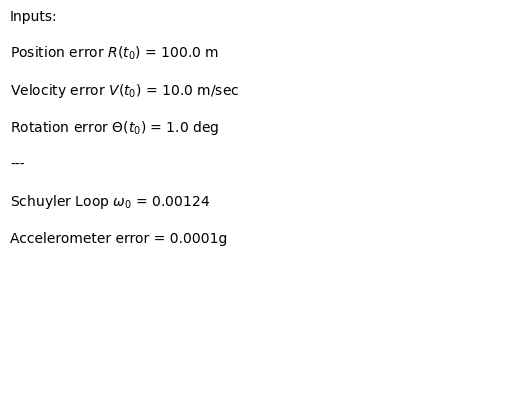

In [4]:
plt.axis('off')

y_start = 1
step = 0.1
lines = [
    'Inputs:',
    'Position error $R(t_0)$ = 100.0 m',
    'Velocity error $V(t_0)$ = 10.0 m/sec',
    'Rotation error $\Theta(t_0)$ = 1.0 deg',
    '---',
    r'Schuyler Loop $\omega_{0}$ = 0.00124',
    'Accelerometer error = 0.0001g'
]

for i, line in enumerate(lines):
    plt.text(0, 1 - i * step, line)

plt.show()

In [5]:
arr01, arr02, arr03 = estimate(100.0, 10.0, 1.0, 0.0, 0.0001)
arr11, arr12, arr13 = estimate(100.0, 10.0, 1.0, 1.0, 0.0001)
arr21, arr22, arr23 = estimate(100.0, 10.0, 1.0, 2.0, 0.0001)
arr31, arr32, arr33 = estimate(100.0, 10.0, 1.0, 3.0, 0.0001)
arr41, arr42, arr43 = estimate(100.0, 10.0, 1.0, 4.0, 0.0001)

Text(7000, 100000, 'Schuler Loop')

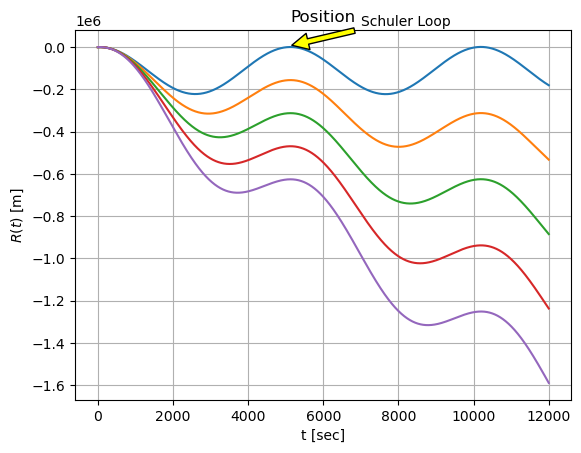

In [6]:
plt.title('Position')
plt.xlabel('t [sec]')
plt.ylabel(r'$R(t)$ [m]')
plt.plot(arr01)
plt.plot(arr11)
plt.plot(arr21)
plt.plot(arr31)
plt.plot(arr41)
plt.grid(True)
plt.annotate('Schuler Loop', xy=(5064,5064), xytext=(7000, 100000),
            arrowprops=dict(facecolor='yellow', shrink=0.05),)

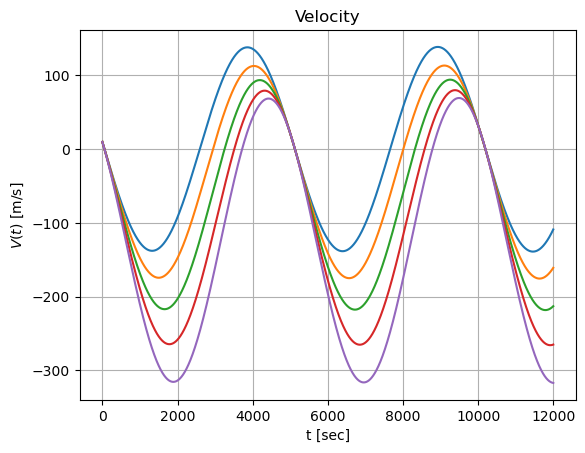

In [7]:
plt.title('Velocity')
plt.xlabel('t [sec]')
plt.ylabel(r'$V(t)$ [m/s]')
plt.plot(arr02)
plt.plot(arr12)
plt.plot(arr22)
plt.plot(arr32)
plt.plot(arr42)
plt.grid(True)

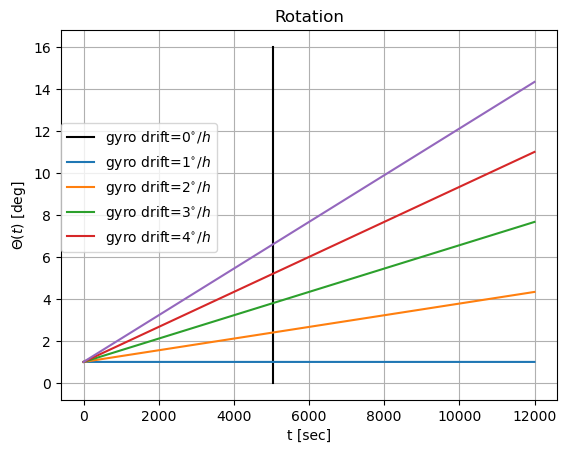

In [8]:
plt.title('Rotation')
plt.xlabel('t [sec]')
plt.ylabel(r'$\Theta(t)$ [deg]')
plt.plot([5046,5046],[0,16],'black')
plt.plot(arr03)
plt.plot(arr13)
plt.plot(arr23)
plt.plot(arr33)
plt.plot(arr43)
plt.grid(True)
plt.legend((r'gyro drift=$0^{\circ}/h$',
            r'gyro drift=$1^{\circ}/h$',
            r'gyro drift=$2^{\circ}/h$',
            r'gyro drift=$3^{\circ}/h$',
            r'gyro drift=$4^{\circ}/h$'),loc=(0.0,0.4))